# Temproral Trend Analysis and Significance Testing

### Summary of Notebook
* Analyzed temporal trends for Historical Menu data and subsets in order to determine if trends match Michelin data
* Used regression analysis to train and test models as well as  to determine if there is a significant relationship between Pricing and Menu length as well as Pricing and Description length

* This analysis includes analysis of the Michelin and NYPL Historical Menu dataframes and corresponding subsets:
    * NYPL = `nypl_hm_df`
        * NYPL data sentenceBERT subset = `fancy_nypl_df`
        * NYPL data filtered by price cap = `above_55_df`
    * Michelin = `michelin_df`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
nypl_hm_df = pd.read_csv('nypl_hm_df.csv', index_col = [0])
fancy_nypl_df = pd.read_csv('fancy_nypl_df.csv', index_col = [0])
above_55_df = pd.read_csv('above_55_df.csv', index_col = [0])
michelin_df = pd.read_csv('michelin_df.csv', index_col = [0])

In [137]:
# nypl_df = pd.read_csv('restaurant_data.csv', index_col = [0])
# nypl_hm_df = pos_rest

In [138]:
# filtering the rows with inaccurate date information
# this dataframe contains restaurants merged with dishes that appear on the menu
nypl_hm_df = nypl_hm_df[(nypl_hm_df['date'] != '2928-03-26')]
nypl_hm_df = nypl_hm_df[(nypl_hm_df['date'] != '0001-01-01')]
nypl_hm_df.reset_index(inplace = True, drop = True)
nypl_hm_df

,menu_id,place,occasion,date,location,page_count,dish_count,dish_name,dish_id,menu_item_id,...,highest_price,price,high_price,tokenized_desc,no_stopwords,pos_desc,desc_len,desc_all_len,cleaned_text,clean_text
0,12534,PABST BLUE RIBBON,NaN,1900-03-11,Pabst Blue Ribbon,2,52,sliced bananas,31.0,42565,...,15.0,0.15,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas
1,12545,"137 E. MADISON ST.,CHICAGO,ILL.",NaN,1900-03-30,German Restaurant & Buffet,4,113,sliced bananas,31.0,21187,...,15.0,0.15,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas
2,12654,NaN,NaN,1900-03-11,Pabst Blue Ribbon,2,50,sliced bananas,31.0,173443,...,15.0,0.15,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas
3,12665,NaN,NaN,1900-03-30,German Restaurant & Buffet,4,112,sliced bananas,31.0,7878,...,15.0,15.00,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas
4,12700,"137 E. MADISON ST. CHICAGO, ILL.",DAILY,1900-03-31,German Restaurant & Buffet,4,109,sliced bananas,31.0,10775,...,15.0,0.15,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839495,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,omelette mit schincken,498469.0,1366284,...,1.5,1.50,NaN,"[omelette, mit, schincken]","[omelette, mit, schincken]","[(omelette, NN), (mit, NN), (schincken, NN)]",3.0,3.0,"'omelette', 'mit', 'schincken'",omelette mit schincken
839496,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,omelette mit rhum,498470.0,1366285,...,1.5,1.50,NaN,"[omelette, mit, rhum]","[omelette, mit, rhum]","[(omelette, NN), (mit, NN), (rhum, NN)]",3.0,3.0,"'omelette', 'mit', 'rhum'",omelette mit rhum
839497,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,omelette mit confiture,498471.0,1366286,...,1.5,1.50,NaN,"[omelette, mit, confiture]","[omelette, mit, confiture]","[(omelette, NN), (mit, NN), (confiture, NN)]",3.0,3.0,"'omelette', 'mit', 'confiture'",omelette mit confiture
839498,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,süsse tagesplatten,498472.0,1366288,...,1.0,1.00,NaN,"[süsse, tagesplatten]","[süsse, tagesplatten]","[(süsse, NN), (tagesplatten, NN)]",2.0,2.0,"'süsse', 'tagesplatten'",susse tagesplatten


In [139]:
# creating date bins
decade_str = ['1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930',
              '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010']

decades = []
for ind, row in nypl_hm_df.iterrows():
    for dec_bin in decade_str:
        if row['date'][0:3] == dec_bin[0:3]:
            decades.append(int(dec_bin))
    if len(decades) != ind + 1:
        decades.append('Na')
            
nypl_hm_df['decade'] = decades

In [123]:
dish_freq = nypl_hm_df.groupby('decade')['dish_name'].value_counts()

* The following output shows the most common dishes by frequency for each decade in the NYPL dataset
* It seems clear that this dataset has the most data collected fromn the years 1900 to 1950

In [140]:
for year in decade_str:
    test_df = dish_freq.loc[int(year), slice(None), :]
    print(test_df[0:10])

decade  dish_name       
1850    Hockheimer          4
        Haut Sauterne       3
        Mumm's Cabinet      3
        Sardines            3
        Amontillado         2
        Annisette           2
        Apple Sauce         2
        Chambertin          2
        Chateau Langoa      2
        Chateau Leoville    2
Name: dish_name, dtype: int64
decade  dish_name        
1860    Cauliflower          8
        Apple Jelly          6
        Broiled Blue Fish    6
        Cantelope Melons     6
        Chicken salad        6
        Coffee               6
        Concord Grapes       6
        Currant Jelly        6
        Dressed Celery       6
        Dressed Lettuce      6
Name: dish_name, dtype: int64
decade  dish_name                         
1870    Adams Champagne Cider, pts            1
        Adams Champagne Cider, qts            1
        Amontillado                           1
        Bass' India Ale                       1
        Blackberry Wine                     

#### Temporal trend analysis of features relevant to the hypothesis for NYPL full dataset

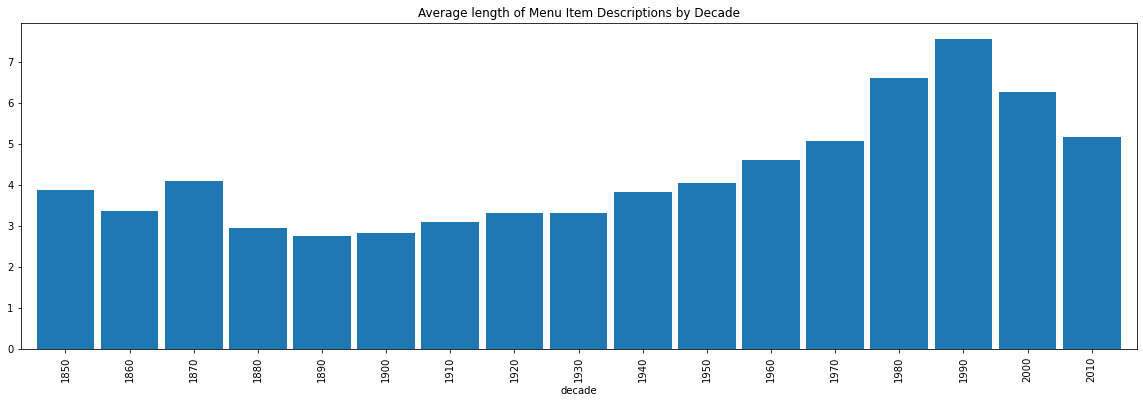

In [165]:
avg_menu_length = nypl_df.groupby('decade')['desc_all_len'].mean()

avg_menu_length.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average length of Menu Item Descriptions by Decade');


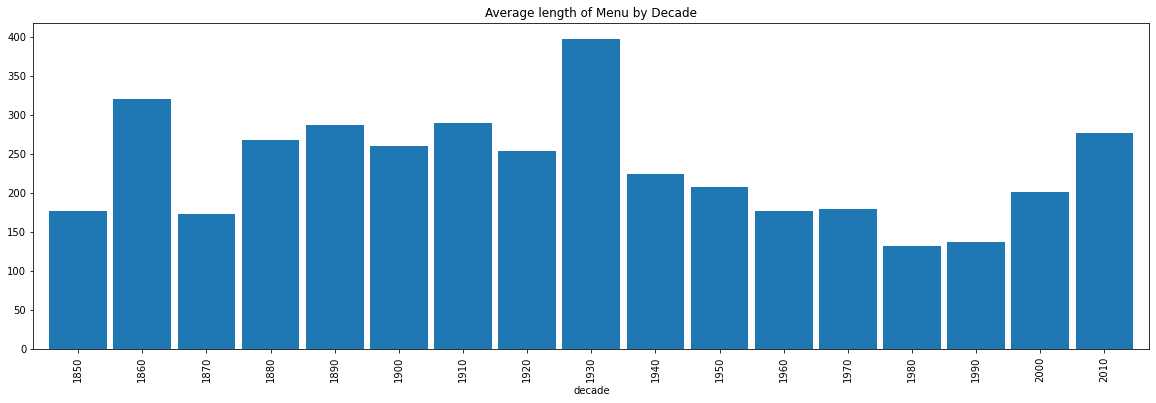

In [166]:
avg_dish_count = nypl_df.groupby('decade')['dish_count'].mean()

avg_dish_count.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average length of Menu by Decade');

#### Temporal trend analysis of features relevant to the hypothesis for NYPL sentenceBERT filtered dataset

In [121]:
fancy_nypl_df = filtered_df
fancy_nypl_df

,menu_id,place,occasion,date,location,page_count,dish_count,dish_name,dish_id,menu_item_id,...,highest_price,price,high_price,tokenized_desc,no_stopwords,pos_desc,desc_len,desc_all_len,cleaned_text,clean_text
637990,16016,NaN,NaN,1901-08-30,Southern Pacific Company,2,57,"american, edam or roquefort cheese, with bent'...",30323.0,79398,...,0.20,0.20,NaN,"[american,, edam, or, roquefort, cheese,, with...","[american,, edam, roquefort, cheese,, bent's, ...","[(american,, NN), (edam, NN), (roquefort, NN),...",6.0,8.0,"'american,', 'edam', 'roquefort', 'cheese,', '...",american edam roquefort cheese bents crackers
865400,26689,Hana-Bishi,NaN,1970-01-01,Hana Bishi,5,97,"ishi-yaki thinly sliced choice n.y. steak, ala...",157811.0,511872,...,6.50,6.50,NaN,"[ishi-yaki, thinly, sliced, choice, n.y., stea...","[ishi-yaki, thinly, sliced, choice, n.y., stea...","[(ishi-yaki, JJ), (thinly, RB), (sliced, JJ), ...",28.0,34.0,"'ishi-yaki', 'thinly', 'sliced', 'choice', 'n....",ishiyaki thinly sliced choice ny steak alaskan...
865673,26693,The Navigator Room (Navigator Restaurant),NaN,1969-06-15,Harborside Inn,5,55,"fried seafood platter clams, scallops, swordfi...",172129.0,530043,...,5.50,5.50,NaN,"[fried, seafood, platter, clams,, scallops,, s...","[fried, seafood, platter, clams,, scallops,, s...","[(fried, VBN), (seafood, NN), (platter, NN), (...",13.0,13.0,"'fried', 'seafood', 'platter', 'clams,', 'scal...",fried seafood platter clams scallops swordfish...
869091,26710,Fiorello's,NaN,2000-11-06,Fiorello's,4,112,"roasted chilean seabass borlotti beans, pancet...",462838.0,534732,...,0.00,22.95,NaN,"[roasted, chilean, seabass, borlotti, beans,, ...","[roasted, chilean, seabass, borlotti, beans,, ...","[(roasted, VBN), (chilean, JJ), (seabass, NN),...",10.0,10.0,"'roasted', 'chilean', 'seabass', 'borlotti', '...",roasted chilean seabass borlotti beans pancett...
877228,26783,The Chronicle,NaN,1976-11-10,The Chronicle,3,57,"moller salad ~ mixed greens with tomatoes, swi...",420756.0,504381,...,5.25,5.25,NaN,"[moller, salad, ~, mixed, greens, with, tomato...","[moller, salad, ~, mixed, greens, tomatoes,, s...","[(moller, NN), (salad, NN), (~, NNP), (mixed, ...",30.0,33.0,"'moller', 'salad', '~', 'mixed', 'greens', 'to...",moller salad mixed greens tomatoes swiss chee...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108900,30944,NaN,NaN,1938-08-25,Donahoe's,2,247,"just as they fry it ""down on the farm"" -donaho...",430379.0,1157565,...,1.25,1.25,NaN,"[just, as, they, fry, it, ""down, on, the, farm...","[fry, ""down, farm"", -donahoe's, farm, style, c...","[(fry, RB), (""down, JJ), (farm"", NN), (-donaho...",94.0,155.0,"'fry', '""down', 'farm""', '-donahoe's', 'farm',...",fry down farm donahoes farm style chicken dinn...
1108906,30944,NaN,NaN,1938-08-25,Donahoe's,2,247,charcoal grilled planked steak or chicken dinn...,430396.0,882666,...,1.00,1.00,NaN,"[charcoal, grilled, planked, steak, or, chicke...","[charcoal, grilled, planked, steak, chicken, d...","[(charcoal, NN), (grilled, VBD), (planked, JJ)...",47.0,65.0,"'charcoal', 'grilled', 'planked', 'steak', 'ch...",charcoal grilled planked steak chicken dinner ...
1135298,31221,NaN,NaN,1933-03-23,Prince George Hotel,4,229,"*grilled spanish mackerel, creamed potatoes, c...",358810.0,931741,...,1.00,1.00,NaN,"[*grilled, spanish, mackerel,, creamed, potato...","[*grilled, spanish, mackerel,, creamed, potato...","[(*grilled, JJ), (spanish, JJ), (mackerel,, NN...",15.0,19.0,"'*grilled', 'spanish', 'mackerel,', 'creamed',...",grilled spanish mackerel creamed potatoes choi...
1147083,31651,NaN,NaN,1926-04-04,Hotel Woodstock,2,136,special easter dinner (pt.1): fresh fruit cock...,368497.0,969023,...,0.00,1.75,NaN,"[special, easter, dinner, (pt.1):, fresh, frui...","[special, easter, dinner, (pt.1):, fresh, frui...","[(special, JJ), (easter, NN), (dinner, NN), ((...",34.0,39.0,"'special', 'easter', 'dinner', '(pt.1):', 'fre...",special easter dinner pt fresh f

In [125]:
fancy_nypl_df = fancy_nypl_df[(fancy_nypl_df['date'] != '2928-03-26')]
fancy_nypl_df = fancy_nypl_df[(fancy_nypl_df['date'] != '0001-01-01')]
fancy_nypl_df.reset_index(inplace = True)

In [126]:
decades = []
for ind, row in fancy_nypl_df.iterrows():
    for dec_bin in decade_str:
        if row['date'][0:3] == dec_bin[0:3]:
            decades.append(int(dec_bin))
    if len(decades) != ind + 1:
        decades.append('Na')
            
fancy_nypl_df['decade'] = decades

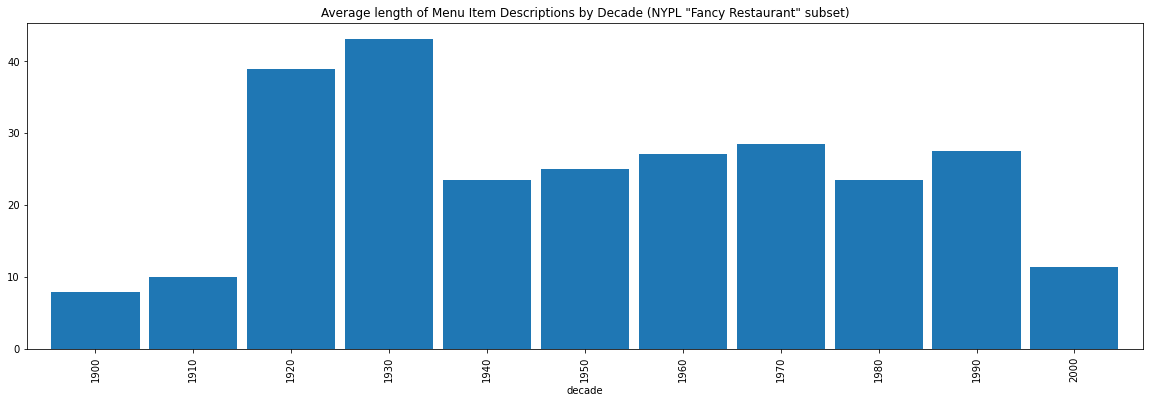

In [128]:
avg_menu_length = fancy_nypl_df.groupby('decade')['desc_all_len'].mean()

avg_menu_length.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average length of Menu Item Descriptions by Decade (NYPL "Fancy Restaurant" subset)');


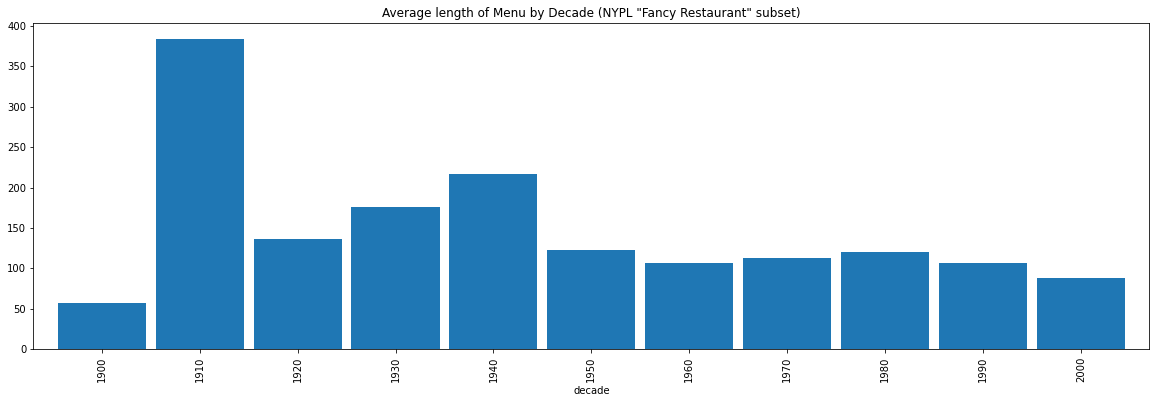

In [133]:
avg_dish_count = fancy_nypl_df.groupby('decade')['dish_count'].mean()

avg_dish_count.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average length of Menu by Decade (NYPL "Fancy Restaurant" subset)');

# outlier in 1910, only one data point to work with and dish count = 384

* Trend comparison of complement dataset to `fancy_nypl_df`, to determine if the fancy subset follows similar trends to the rest of the original NYPL dataset. 

In [144]:
cond = ~nypl_df['menu_id'].isin(filtered_df['menu_id'])
comp_df = nypl_df[cond]

In [145]:
# filtering for dates again
comp_df = comp_df[(comp_df['date'] != '2928-03-26')]
comp_df = comp_df[(comp_df['date'] != '0001-01-01')]
comp_df.reset_index(inplace = True)
comp_df

# binning again
decades = []
for ind, row in comp_df.iterrows():
    for dec_bin in decade_str:
        if row['date'][0:3] == dec_bin[0:3]:
            decades.append(int(dec_bin))
    if len(decades) != ind + 1:
        decades.append('Na')
            
comp_df['decade'] = decades

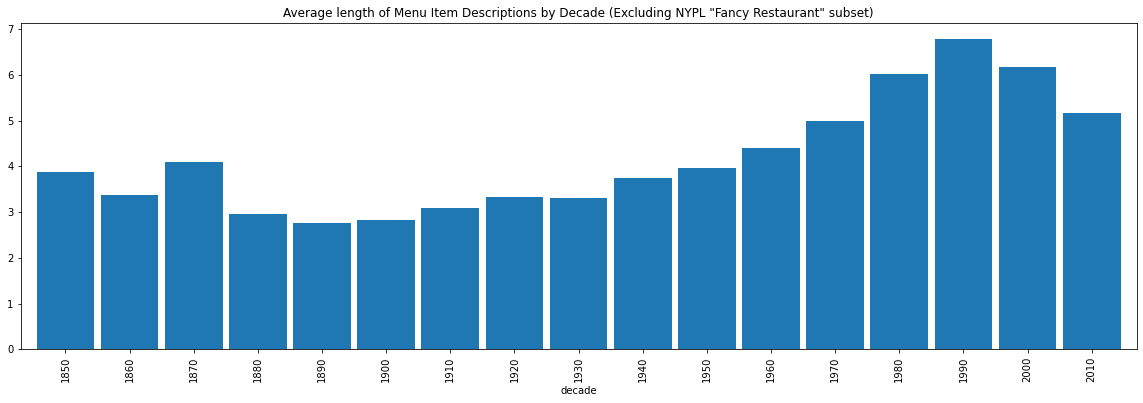

In [146]:
avg_menu_length = comp_df.groupby('decade')['desc_all_len'].mean()

avg_menu_length.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average length of Menu Item Descriptions by Decade (Excluding NYPL "Fancy Restaurant" subset)');


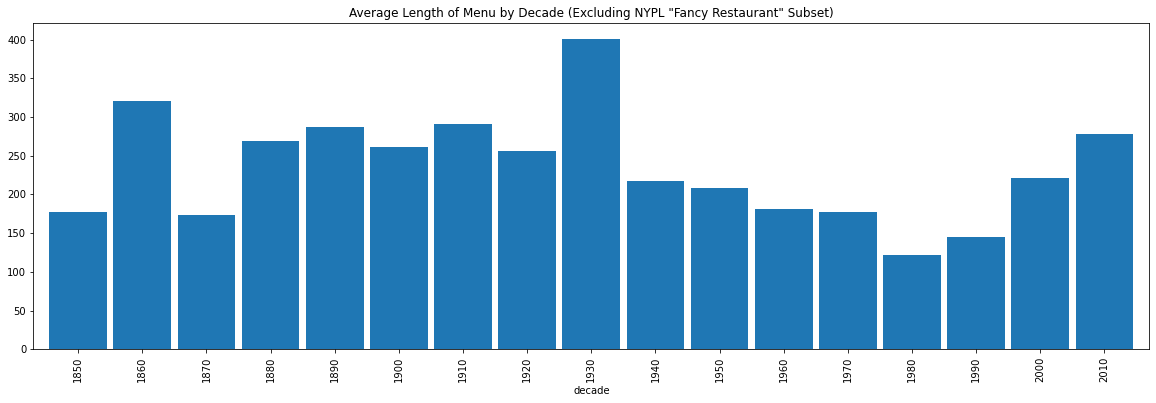

In [147]:
avg_dish_count = comp_df.groupby('decade')['dish_count'].mean()

avg_dish_count.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average Length of Menu by Decade (Excluding NYPL "Fancy Restaurant" Subset)');

* Findings from this small comparison show that the sentenceBERT item description length are far larger for each restaurant compared to the total NYPL Historical Menu dataset.
* The distribution for menu items by decade are similar between the subset and the resti of the data

#### Temporal trend analysis of features relevant to the hypothesis for NYPL dataset filtered to only contain items from resturants with average dish prices over Fifty-Five dollars

* Using michelin info to detemine appropriate price cap ($55) and create subset
* Taking this opportunity to add dish comparison data for full NYPL dataset as well

In [148]:
ones = pd.read_csv('archive/one-star-michelin-restaurants.csv')
twos = pd.read_csv('archive/two-stars-michelin-restaurants.csv')
threes = pd.read_csv('archive/three-stars-michelin-restaurants.csv')

michelin_df_uncleaned = pd.concat([ones,twos,threes])

In [149]:
michelin_df = mich_data.merge(michelin_df_uncleaned[['price', 'name']], how = 'left',
                left_on = 'name', right_on = 'name')

michelin_df

,name,Menu Items,Item Descriptions,Menu_Items_done,Item_desc_done,cleaned_text,clean_text,price
0,Sushi Inoue,"['Soup of the Day', 'Garden Salad', 'Seaweed S...","['', '', '', '', '', '', '', '', '', '', '', '...",soup of the day garden salad seaweed salad sea...,lean tuna analog and cucumber chopped fatty tu...,Soup of the Day Garden Salad Seaweed Salad Sea...,Soup of the Day Garden Salad Seaweed Salad Sea...,$$$$
1,Jean-Georges,"['Two Egg Toast, Caviar, Herbs', 'Two Egg Toas...",['1 oz of Petrossian Special JG Selection Cavi...,two egg toast caviar herbs two egg toast cavia...,oz of petrossian special jg selection caviar o...,Two Egg Toast Caviar Herbs Two Egg Toast Cavia...,Two Egg Toast Caviar Herbs Two Egg Toast Cavia...,$$$$
2,Masa,['Kegani Hairy Crab With Chrysanthemum Sunomon...,"['', '', '', '', '', '', '', '', '', '', '', '...",kegani hairy crab with chrysanthemum sunomono ...,wasabicress ampamp chikuwa with wasabi dressin...,Kegani Hairy Crab With Chrysanthemum Sunomono ...,Kegani Hairy Crab With Chrysanthemum Sunomono ...,$$$$
3,Marea,"['South Bay Blonde', 'East Beach Blonde', 'Kum...","['massachusetts', 'rhode island', 'washington'...",south bay blonde east beach blonde kumamoto to...,massachusetts rhode island washington new york...,South Bay Blonde East Beach Blonde Kumamoto To...,South Bay Blonde East Beach Blonde Kumamoto To...,$$$$
4,Daniel,"['Huitre Shigoku', 'Seriole', 'Poularde', 'Hom...",['chilled oysters &amp;quot;en gelée&amp;quot;...,huitre shigoku seriole poularde homard topinam...,chilled oysters ampquoten geleeampquot fennel ...,Huitre Shigoku Seriole Poularde Homard Topinam...,Huitre Shigoku Seriole Poularde Homard Topinam...,$$$$
5,Le Bernardin,"['Royal Osetra Caviar', 'Golden Imperial Cavia...","['$130.00 supplement per ounce', '$145.00 supp...",royal osetra caviar golden imperial caviar oys...,supplement per ounce supplement per ounce sing...,Royal Osetra Caviar Golden Imperial Caviar Oys...,Royal Osetra Caviar Golden Imperial Caviar Oys...,$$$$
6,The Modern,"['Autumn Lettuces', 'Warm Watermelon &amp;amp;...","['Avocado and mint.', 'Creme fraîche and fines...",autumn lettuces warm watermelon ampamp caviar ...,avocado and mint creme fraiche and fines herbs...,Autumn Lettuces Warm Watermelon ampamp Caviar ...,Autumn Lettuces Warm Watermelon ampamp Caviar ...,$$$$
7,Aquavit,"['Potato Leek Soup', 'Herring Sampler', 'Shrim...",['pickled potato salad&amp;comma; capers&amp;c...,potato leek soup herring sampler shrimp skagen...,pickled potato saladampcomma capersampcomma ch...,Potato Leek Soup Herring Sampler Shrimp Skagen...,Potato Leek Soup Herring Sampler Shrimp Skagen...,NaN
8,Aquavit,"['Potato Leek Soup', 'Herring Sampler', 'Shrim...",['pickled potato salad&amp;comma; capers&amp;c...,potato leek soup herring sampler shrimp skagen...,pickled potato saladampcomma capersampcomma ch...,Potato Leek Soup Herring Sampler Shrimp Skagen...,Potato Leek Soup Herring Sampler Shrimp Skagen...,$$$$
9,Caviar Russe,"['Spring Creek Oyster', 'Blue Fin Tuna', 'Foie...",['tomato&amp;comma; horseradish&amp;comma; cel...,spring creek oyster blue fin tuna foie gras te...,tomatoampcomma horseradishampcomma celeryampco...,Spring Creek Oyster Blue Fin Tuna Foie Gras Te...,Spring Creek Oyster Blue Fin Tuna Foie Gras Te...,$$$$


In [150]:
# overview of data distribution for price categories
michelin_df['price'].value_counts() 

$$$$    24
$$$      9
$$       1
Name: price, dtype: int64

In [152]:
michelin_df["price"] = michelin_df["price"].astype('category')

In [153]:
michelin_df['price_cat'] = michelin_df["price"].cat.codes

In [182]:
michelin_df_nonan = michelin_df.loc[michelin_df['price_cat'] != -1] # removing Nan from dataset to get the average meal size


In [198]:
# assigning price threshold to each variable
menu_length = []
for index, row in michelin_df_nonan.iterrows():
    length = len(row['Menu Items'].split(','))
    menu_length.append(length)

#michelin_df['menu_length'] = menu_length
michelin_df_nonan['menu_length'] = menu_length

# formatting pricing info for regression analysis
menu_price = []
for index, row in mich_data_price.iterrows():
    if row['price_cat'] == 0:
        menu_price.append(25)
    if row['price_cat'] == 1:
        menu_price.append(45)
    if row['price_cat'] == 2:
        menu_price.append(55)
michelin_df_nonan['price_int'] = menu_price

In [202]:
# adding description length for further analysis
desc_len = []
for index, row in michelin_df.iterrows():
    item_wc = []
    item_descs = row['Item Descriptions'].split(',')
    for item in item_descs:
        if len(item.split()) == 1: # removing items where there is no description
            continue
        item_wc.append(len(item.split()))
#     if sum(item_wc) == 0:
#         continue
    desc_len.append(sum(item_wc))
    
michelin_df['tot_desc_len'] = desc_len

<ipython-input-202-aa927f2b5fb8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  michelin_df_nonan['tot_desc_len'] = desc_len


In [155]:
# collecting historical menu data from same price 
#range in order to see if there are any similarities between set and michelin set.
# prie range for $$$$ is $55 and over
sort_rest = nypl_df.groupby('location')
avg_price_nypl = sort_rest['price'].mean('price')


In [156]:
avg_price_nypl = avg_price_nypl.to_frame()

In [157]:
avg_price_nypl = avg_price_nypl.reset_index()

avg_price_nypl

,location,price
0,South Ferry Hotel,0.239744
1,19th Hole,1.455682
2,22nd Regiment A.G.S.A.Y.,2.000000
3,238 Eight Avenue,0.186290
4,2601 Parkway,0.630000
...,...,...
2306,[Restaurant name and/or location not given],0.295673
2307,[Soo Line Railroad Company],0.379839
2308,[Southern Pacific Railroad Company],0.423276
2309,"[The Waldorf Astoria Hotel (New York, N.Y.)]",0.698256


In [159]:
nypl_df = nypl_df.merge(avg_price_nypl, how = 'left'
                        , on = 'location')

In [161]:
nypl_df = nypl_df.rename(columns={'price_y': 'avg_price_at_restaurant'})

nypl_df

,menu_id,place,occasion,date,location,page_count,dish_count,dish_name,dish_id,menu_item_id,...,high_price,tokenized_desc,no_stopwords,pos_desc,desc_len,desc_all_len,cleaned_text,clean_text,decade,avg_price_at_restaurant
0,12534,PABST BLUE RIBBON,NaN,1900-03-11,Pabst Blue Ribbon,2,52,sliced bananas,31.0,42565,...,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas,1900,0.236913
1,12545,"137 E. MADISON ST.,CHICAGO,ILL.",NaN,1900-03-30,German Restaurant & Buffet,4,113,sliced bananas,31.0,21187,...,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas,1900,11.182186
2,12654,NaN,NaN,1900-03-11,Pabst Blue Ribbon,2,50,sliced bananas,31.0,173443,...,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas,1900,0.236913
3,12665,NaN,NaN,1900-03-30,German Restaurant & Buffet,4,112,sliced bananas,31.0,7878,...,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas,1900,11.182186
4,12700,"137 E. MADISON ST. CHICAGO, ILL.",DAILY,1900-03-31,German Restaurant & Buffet,4,109,sliced bananas,31.0,10775,...,NaN,"[sliced, bananas]","[sliced, bananas]","[(sliced, VBN), (bananas, NNS)]",2.0,2.0,"'sliced', 'bananas'",sliced bananas,1900,11.182186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839495,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,omelette mit schincken,498469.0,1366284,...,NaN,"[omelette, mit, schincken]","[omelette, mit, schincken]","[(omelette, NN), (mit, NN), (schincken, NN)]",3.0,3.0,"'omelette', 'mit', 'schincken'",omelette mit schincken,1910,1.433230
839496,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,omelette mit rhum,498470.0,1366285,...,NaN,"[omelette, mit, rhum]","[omelette, mit, rhum]","[(omelette, NN), (mit, NN), (rhum, NN)]",3.0,3.0,"'omelette', 'mit', 'rhum'",omelette mit rhum,1910,1.433230
839497,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,omelette mit confiture,498471.0,1366286,...,NaN,"[omelette, mit, confiture]","[omelette, mit, confiture]","[(omelette, NN), (mit, NN), (confiture, NN)]",3.0,3.0,"'omelette', 'mit', 'confiture'",omelette mit confiture,1910,1.433230
839498,35518,NaN,NaN,1913-09-24,Hotel Schynige Platte und Hotel Bellevue,4,161,süsse tagesplatten,498472.0,1366288,...,NaN,"[süsse, tagesplatten]","[süsse, tagesplatten]","[(süsse, NN), (tagesplatten, NN)]",2.0,2.0,"'süsse', 'tagesplatten'",susse tagesplatten,1910,1.433230


* initial distribution of pricing through the years in order to determine if there are substantial increases that may be attributed to factors like inflation

In [179]:
price_dist_nypl = nypl_df.groupby('decade')['avg_price_at_restaurant'].median()

price_dist_nypl

decade
1850     2.046923
1860     1.219279
1870     2.391461
1880     0.930860
1890     0.664945
1900     0.574344
1910     0.748195
1920     0.963780
1930     0.613013
1940     0.732847
1950     1.507999
1960     1.872849
1970     6.077632
1980     5.757328
1990    13.420213
2000     7.253109
2010    67.682292
Name: avg_price_at_restaurant, dtype: float64

In [181]:
above_55_df = nypl_df.loc[nypl_df['avg_price_at_restaurant'] >= 55]

above_55_df

,menu_id,place,occasion,date,location,page_count,dish_count,dish_name,dish_id,menu_item_id,...,high_price,tokenized_desc,no_stopwords,pos_desc,desc_len,desc_all_len,cleaned_text,clean_text,decade,avg_price_at_restaurant
4452,26463,Mon cher ton ton,NaN,1969-12-26,Mon Cher Ton Ton,4,108,sirloin steak,247.0,485905,...,NaN,"[sirloin, steak]","[sirloin, steak]","[(sirloin, NN), (steak, NN)]",2.0,2.0,"'sirloin', 'steak'",sirloin steak,1960,722.277228
4486,27876,NaN,NaN,1971-05-01,Bamerette,7,95,sirloin steak,247.0,1001296,...,NaN,"[sirloin, steak]","[sirloin, steak]","[(sirloin, NN), (steak, NN)]",2.0,2.0,"'sirloin', 'steak'",sirloin steak,1970,72.339474
4914,26461,Fujiya Hotel,NaN,1968-01-01,Fujiya Hotel,7,170,plain omelet,5962.0,485151,...,NaN,"[plain, omelet]","[plain, omelet]","[(plain, NN), (omelet, NN)]",2.0,2.0,"'plain', 'omelet'",plain omelet,1960,405.757576
5191,26463,Mon cher ton ton,NaN,1969-12-26,Mon Cher Ton Ton,4,108,baked potatoes,920.0,485884,...,NaN,"[baked, potatoes]","[baked, potatoes]","[(baked, VBN), (potatoes, NNS)]",2.0,2.0,"'baked', 'potatoes'",baked potatoes,1960,722.277228
6336,26458,Orchid Room,NaN,1969-12-01,Hotel Okura,3,99,lyonnaise potatoes,293.0,1324799,...,NaN,"[lyonnaise, potatoes]","[lyonnaise, potatoes]","[(lyonnaise, NN), (potatoes, NNS)]",2.0,2.0,"'lyonnaise', 'potatoes'",lyonnaise potatoes,1960,214.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826178,34834,NaN,NaN,1912-08-31,Grand Hotel Hungaria,4,400,tarkonyos uruborda,475170.0,1320568,...,NaN,"[tarkonyos, uruborda]","[tarkonyos, uruborda]","[(tarkonyos, NN), (uruborda, NN)]",2.0,2.0,"'tarkonyos', 'uruborda'",tarkonyos uruborda,1910,197.823529
826179,34834,NaN,NaN,1912-08-31,Grand Hotel Hungaria,4,400,tojas talon su lve bibesco modra,475180.0,1320578,...,NaN,"[tojas, talon, su, lve, bibesco, modra]","[tojas, talon, su, lve, bibesco, modra]","[(tojas, NN), (talon, NN), (su, NN), (lve, VBP...",6.0,6.0,"'tojas', 'talon', 'su', 'lve', 'bibesco', 'modra'",tojas talon su lve bibesco modra,1910,197.823529
826180,34834,NaN,NaN,1912-08-31,Grand Hotel Hungaria,4,400,vespepecsenye-szeletek,475332.0,1320824,...,NaN,[vespepecsenye-szeletek],[vespepecsenye-szeletek],"[(vespepecsenye-szeletek, NN)]",1.0,1.0,'vespepecsenye-szeletek',vespepecsenyeszeletek,1910,197.823529
826181,34834,NaN,NaN,1912-08-31,Grand Hotel Hungaria,4,400,sapnyol csoben sulve,475385.0,1320882,...,NaN,"[sapnyol, csoben, sulve]","[sapnyol, csoben, sulve]","[(sapnyol, NN), (csoben, NN), (sulve, NN)]",3.0,3.0,"'sapnyol', 'csoben', 'sulve'",sapnyol csoben sulve,1910,197.823529


* Temporal trends for `above_55_df`

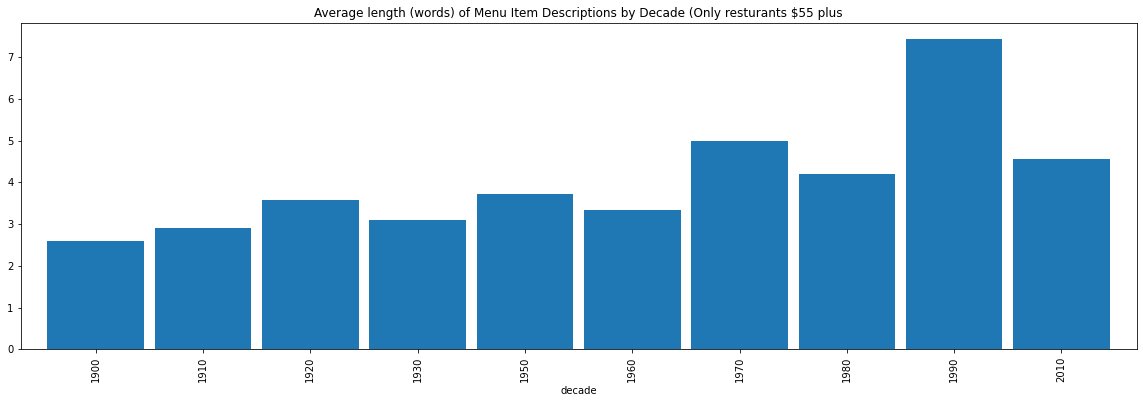

In [193]:
avg_menu_length = above_55_df.groupby('decade')['desc_all_len'].mean()

avg_menu_length.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average length (words) of Menu Item Descriptions by Decade (Only resturants $55 plus');


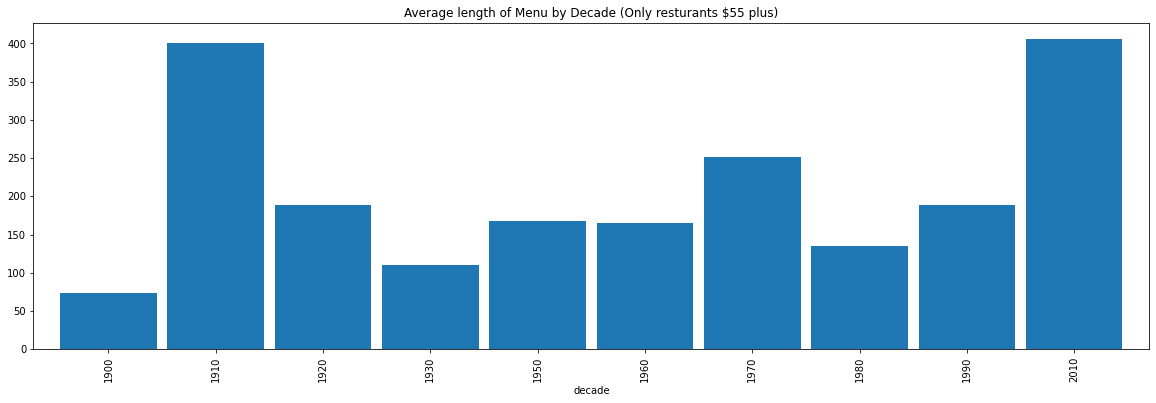

In [192]:
avg_dish_count = above_55_df.groupby('decade')['dish_count'].mean()

avg_dish_count.plot(kind='bar', figsize = (20, 6), width = 0.90, 
                     title = 'Average length of Menu by Decade (Only resturants $55 plus)');


## Regression Analysis and Hypothesis Testing
* Regression analysis will be run to determine if there are significant trends on either "Menu Length" or "Menu item Description" as a predictor of price.
    * Price picked as an indicator or "fanciness" or proximity to Michelin quality

* Running regression analysis on *menu length* as a predictor of price for Michelin dataset

In [122]:
michelin_df_nonan = pd.read_csv('michelin_df_nonan.csv')

In [123]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(michelin_df_nonan['menu_length'], 
                                                    michelin_df_nonan['price_int'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [0.02217885]
Intercept: 49.30029856528585
Mean squared error (MSE): 44.36
Coefficient of determination (R^2): 0.04
Coefficients: [0.02217885]
Intercept: 49.30029856528585
Mean squared error (MSE): 19.47
Coefficient of determination (R^2): -0.59


In [124]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_int   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.131
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.298
Time:                        23:14:36   Log-Likelihood:                -89.507
No. Observations:                  27   AIC:                             183.0
Df Residuals:                      25   BIC:                             185.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3003      2.028     24.314      0.000      45.124      53.476
x1             0.0222      0.021      1.063      0.298      -0.021       0.065
==============================================================================
Omnibus:                       26.725   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.166
Skew:                          -2.066   Prob(JB):                     1.28e-11
Kurtosis:                       8.246   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

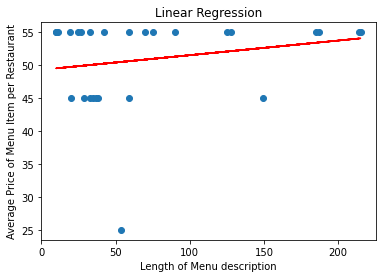

In [125]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 49.3003 + 0.0222*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Menu description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

In [126]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


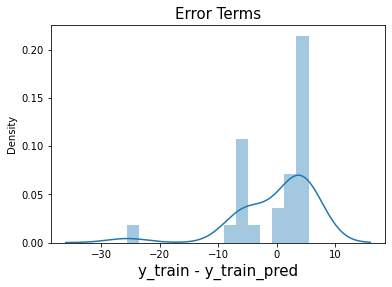

In [127]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [129]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

array([49.81041205, 50.29834669, 54.17964496, 49.63298127, 50.12091591,
       50.01002168, 53.24813338])

In [130]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

-0.5896598078512962

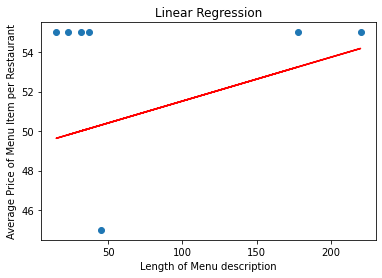

In [132]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Menu description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

* Running regression analysis on *description length* as a predictor of price for Michelin dataset

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(michelin_df_nonan['tot_desc_len'], 
                                                    michelin_df_nonan['price_int'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [0.00076893]
Intercept: 51.10033239748547
Mean squared error (MSE): 45.50
Coefficient of determination (R^2): 0.00
Coefficients: [0.00076893]
Intercept: 51.10033239748547
Mean squared error (MSE): 19.59
Coefficient of determination (R^2): 0.04


In [134]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_int   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.02324
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.880
Time:                        23:16:47   Log-Likelihood:                -89.850
No. Observations:                  27   AIC:                             183.7
Df Residuals:                      25   BIC:                             186.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1003      1.863     27.423      0.000      47.263      54.938
x1             0.0008      0.005      0.152      0.880      -0.010       0.011
==============================================================================
Omnibus:                       30.382   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.806
Skew:                          -2.320   Prob(JB):                     8.47e-15
Kurtosis:                       9.006   Cond. No.                         510.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

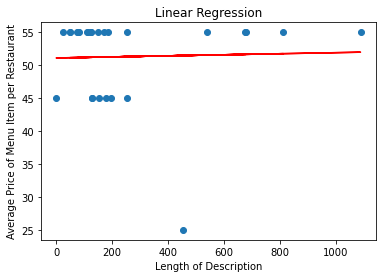

In [135]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 51.1003 + 0.0008*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()


In [136]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


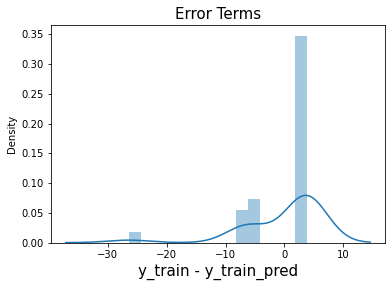

In [137]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [138]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

y_test_pred

array([51.55477157, 51.9846049 , 51.25565678, 52.41290036, 51.19568004,
       51.22720628, 51.66242213])

In [139]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

0.03987157885420389

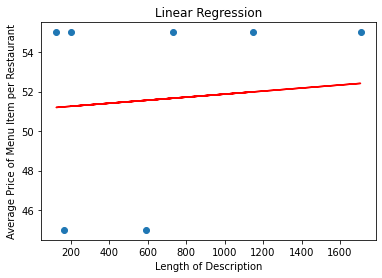

In [140]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

* Running regression analysis on *menu length* as a predictor of price for entire NYPL dataset

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(nypl_hm_df.groupby('location').mean()['dish_count'], 
                                                    nypl_hm_df.groupby('location').mean()['avg_price_at_restaurant'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [0.00245104]
Intercept: 19.730006967686894
Mean squared error (MSE): 58538.85
Coefficient of determination (R^2): 0.00
Coefficients: [0.00245104]
Intercept: 19.730006967686894
Mean squared error (MSE): 5148.24
Coefficient of determination (R^2): -0.02


In [74]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     avg_price_at_restaurant   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.001
Method:                      Least Squares   F-statistic:                  0.002734
Date:                     Tue, 01 Jun 2021   Prob (F-statistic):              0.958
Time:                             23:09:14   Log-Likelihood:                -12765.
No. Observations:                     1848   AIC:                         2.553e+04
Df Residuals:                         1846   BIC:                         2.555e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7300      8.889      2.220      0.027       2.296      37.164
x1             0.0025      0.047      0.052      0.958      -0.089       0.094
==============================================================================
Omnibus:                     4423.911   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30948209.747
Skew:                          23.720   Prob(JB):                         0.00
Kurtosis:                     635.198   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

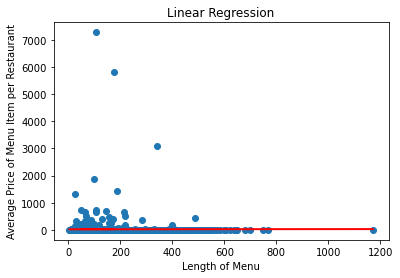

In [75]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 19.2659 + 0.0030*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Menu")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

In [76]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


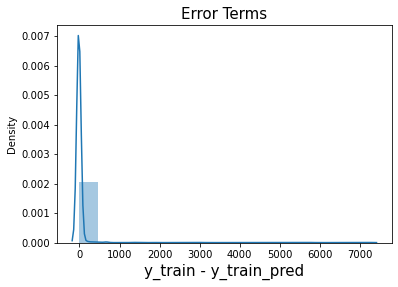

In [77]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

In [79]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

-0.017820449720138853

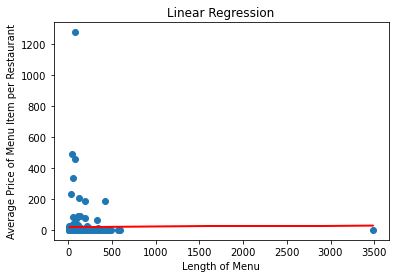

In [80]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Menu")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

* Running regression analysis on *description length* as a predictor of price for entire NYPL dataset

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(nypl_hm_df.groupby('location').sum()['desc_all_len'], 
                                                    nypl_hm_df.groupby('location').mean()['avg_price_at_restaurant'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.00022456]
Intercept: 12.18002187018857
Mean squared error (MSE): 10156.40
Coefficient of determination (R^2): 0.00
Coefficients: [-0.00022456]
Intercept: 12.18002187018857
Mean squared error (MSE): 198420.31
Coefficient of determination (R^2): -0.00


In [142]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     avg_price_at_restaurant   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.2631
Date:                     Tue, 01 Jun 2021   Prob (F-statistic):              0.608
Time:                             23:20:11   Log-Likelihood:                -11147.
No. Observations:                     1848   AIC:                         2.230e+04
Df Residuals:                         1846   BIC:                         2.231e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1800      2.407      5.061      0.000       7.460      16.900
x1            -0.0002      0.000     -0.513      0.608      -0.001       0.001
==============================================================================
Omnibus:                     4185.424   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22636398.994
Skew:                          20.754   Prob(JB):                         0.00
Kurtosis:                     543.607   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

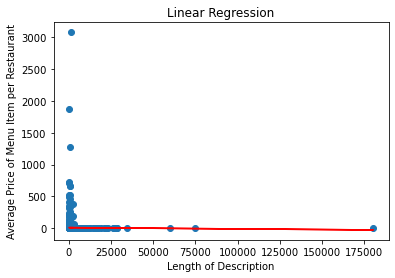

In [143]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 12.1800 + -0.0002*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()


In [84]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


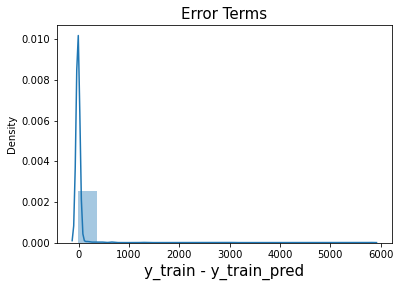

In [85]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

y_test_pred

In [33]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

-0.07387370757828671

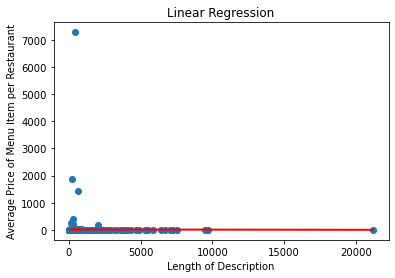

In [87]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

* Running regression analysis on *menu length* as a predictor of price for NYPL fancy dataset

In [88]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(fancy_nypl_df.groupby('location').mean()['dish_count'], 
                                                    fancy_nypl_df.groupby('location').mean()['avg_price_at_restaurant'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.00863232]
Intercept: 5.321125834193769
Mean squared error (MSE): 17.80
Coefficient of determination (R^2): 0.04
Coefficients: [-0.00863232]
Intercept: 5.321125834193769
Mean squared error (MSE): 16.59
Coefficient of determination (R^2): 0.07


In [89]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     avg_price_at_restaurant   R-squared:                       0.037
Model:                                 OLS   Adj. R-squared:                  0.027
Method:                      Least Squares   F-statistic:                     3.643
Date:                     Tue, 01 Jun 2021   Prob (F-statistic):             0.0593
Time:                             23:10:19   Log-Likelihood:                -280.13
No. Observations:                       98   AIC:                             564.3
Df Residuals:                           96   BIC:                             569.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3211      0.751      7.082      0.000       3.830       6.813
x1            -0.0086      0.005     -1.909      0.059      -0.018       0.000
==============================================================================
Omnibus:                       46.400   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.116
Skew:                           1.824   Prob(JB):                     2.02e-24
Kurtosis:                       6.662   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

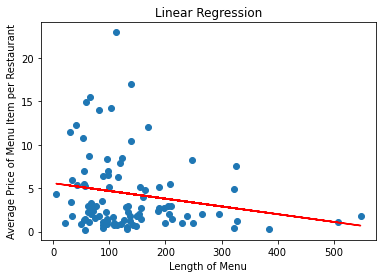

In [90]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 5.5746 + -0.0089*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Menu")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

In [91]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


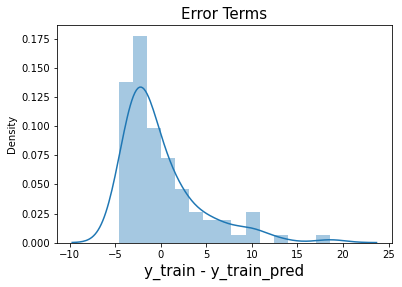

In [92]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

In [94]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

0.06955915574799454

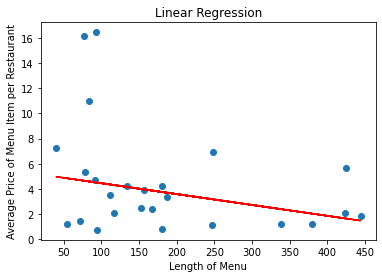

In [95]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Menu")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

* Running regression analysis on *item description* length as a predictor of price for NYPL fancy dataset

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(fancy_nypl_df.groupby('location').sum()['desc_all_len'], 
                                                    fancy_nypl_df.groupby('location').mean()['avg_price_at_restaurant'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [0.01201086]
Intercept: 3.8655768582586814
Mean squared error (MSE): 19.37
Coefficient of determination (R^2): 0.01
Coefficients: [0.01201086]
Intercept: 3.8655768582586814
Mean squared error (MSE): 13.00
Coefficient of determination (R^2): -0.01


In [97]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     avg_price_at_restaurant   R-squared:                       0.013
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     1.250
Date:                     Tue, 01 Jun 2021   Prob (F-statistic):              0.266
Time:                             23:10:34   Log-Likelihood:                -284.27
No. Observations:                       98   AIC:                             572.5
Df Residuals:                           96   BIC:                             577.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8656      0.644      6.004      0.000       2.588       5.144
x1             0.0120      0.011      1.118      0.266      -0.009       0.033
==============================================================================
Omnibus:                       47.186   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.153
Skew:                           1.878   Prob(JB):                     1.98e-24
Kurtosis:                       6.554   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

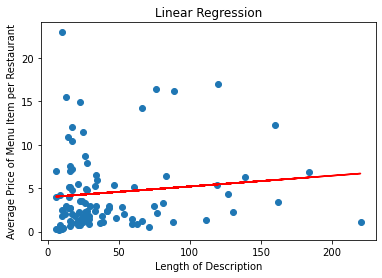

In [99]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 3.9632 + 0.0124*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()


In [100]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


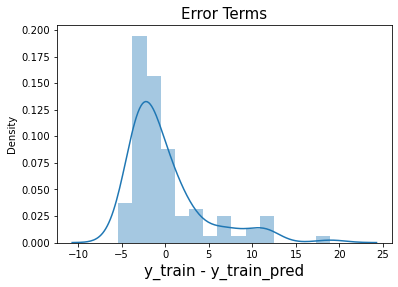

In [101]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

y_test_pred

In [103]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

-0.01029917255420032

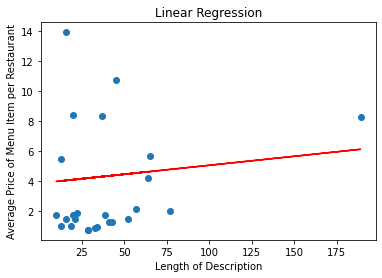

In [104]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

* Running regression analysis on *menu length* as a predictor of price for NYPL above $55 dataset

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(fancy_nypl_df.groupby('location').sum()['dish_count'], 
                                                    fancy_nypl_df.groupby('location').mean()['avg_price_at_restaurant'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.00107654]
Intercept: 4.658457930116455
Mean squared error (MSE): 20.37
Coefficient of determination (R^2): 0.00
Coefficients: [-0.00107654]
Intercept: 4.658457930116455
Mean squared error (MSE): 10.48
Coefficient of determination (R^2): -0.11


In [106]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     avg_price_at_restaurant   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                 -0.007
Method:                      Least Squares   F-statistic:                    0.2882
Date:                     Tue, 01 Jun 2021   Prob (F-statistic):              0.593
Time:                             23:11:04   Log-Likelihood:                -286.73
No. Observations:                       98   AIC:                             577.5
Df Residuals:                           96   BIC:                             582.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6585      0.642      7.259      0.000       3.385       5.932
x1            -0.0011      0.002     -0.537      0.593      -0.005       0.003
==============================================================================
Omnibus:                       43.213   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.883
Skew:                           1.799   Prob(JB):                     8.25e-20
Kurtosis:                       5.928   Cond. No.                         446.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

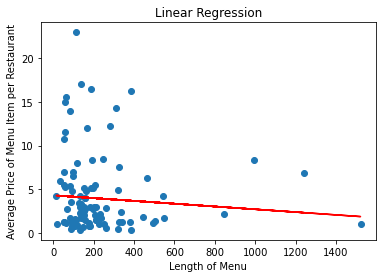

In [107]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 4.3084 + -0.0016*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Menu")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()


In [108]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


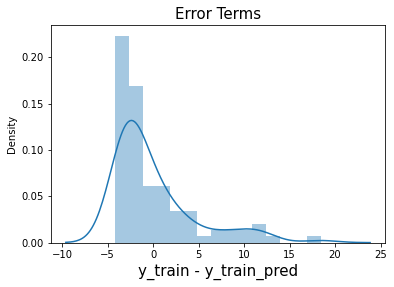

In [109]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

y_test_pred

In [111]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

-0.10997930820411983

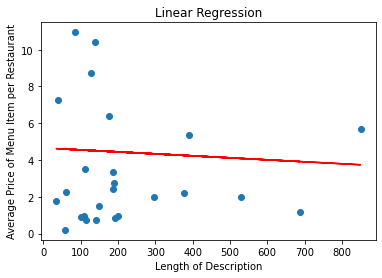

In [112]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()

* Running regression analysis on *description length* as a predictor of price for NYPL above $55 dataset

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(above_55_df.groupby('location').sum()['desc_all_len'], 
                                                    above_55_df.groupby('location').mean()['avg_price_at_restaurant'], test_size=0.2)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.13158234]
Intercept: 836.9041745822518
Mean squared error (MSE): 1976627.78
Coefficient of determination (R^2): 0.00
Coefficients: [-0.13158234]
Intercept: 836.9041745822518
Mean squared error (MSE): 260409.25
Coefficient of determination (R^2): -3.86


In [114]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
y_train = Y_train

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     avg_price_at_restaurant   R-squared:                       0.005
Model:                                 OLS   Adj. R-squared:                 -0.020
Method:                      Least Squares   F-statistic:                    0.1921
Date:                     Tue, 01 Jun 2021   Prob (F-statistic):              0.663
Time:                             23:11:26   Log-Likelihood:                -372.70
No. Observations:                       43   AIC:                             749.4
Df Residuals:                           41   BIC:                             752.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        836.9042    300.648      2.784      0.008     229.733    1444.075
x1            -0.1316      0.300     -0.438      0.663      -0.738       0.475
==============================================================================
Omnibus:                       58.240   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.846
Skew:                           3.471   Prob(JB):                     1.95e-73
Kurtosis:                      14.776   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

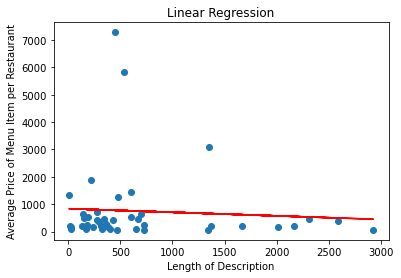

In [115]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 836.9042 + -0.1316*X_train, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()


In [116]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


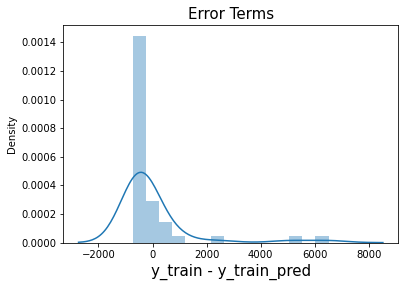

In [117]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

y_test_pred

In [119]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

-3.857903383395862

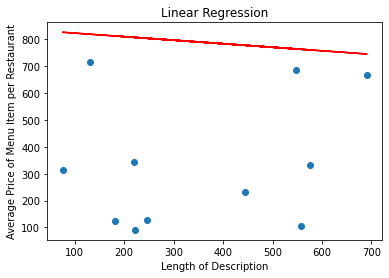

In [120]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.title("Linear Regression")
plt.xlabel("Length of Description")
plt.ylabel("Average Price of Menu Item per Restaurant")
plt.show()